### Waves and Sound: Ch16
#### phys1410, prof. Hyde, Winter 2020

In [48]:
%matplotlib inline

import math
import scipy.integrate
import os
import matplotlib.pylab as plt
import numpy as np
import argparse
#import animation
import matplotlib.animation as animation
from scipy.integrate import solve_ivp #solve an initial value problem for a system of ODEs
from IPython.display import HTML
#from celluloid import Camera
from matplotlib.animation import FuncAnimation

In [49]:
from IPython.display import Audio

Audio(output, rate=fs)

### The wave function y(x,t)=Acos(kx-wt)

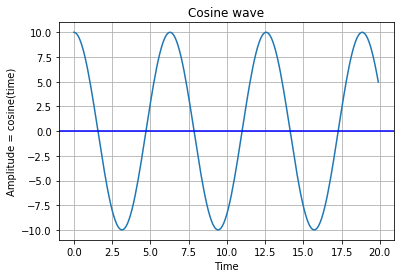

In [51]:
time=np.arange(0,20,.1)

# Amplitude of the cosine wave is cosine of a variable like time
amplitude= 10*np.cos(time)

# Plot a cosine wave using time and amplitude obtained for the cosine wave
plt.plot(time, amplitude)

# Give a title for the cosine wave plot
plt.title('Cosine wave')

# Give x axis label for the cosine wave plot
plt.xlabel('Time')

# Give y axis label for the cosine wave plot
plt.ylabel('Amplitude = cosine(time)')

# Draw the grid for the graph
plt.grid(True, which='both')
plt.axhline(y=0, color='b')
 
plt.show()

### Doppler Shift

If you have ever heard the shift in frequency of a train horn as it passes by at a railroad crossing, you have heard the Doppler effect in action.

The Doppler effect is used by policemen to nab speeding motorists, and by ultrasonographers to measure the speed and direction of flowing blood.

For an observer at rest, Doppler shift is:
fobs=forig*c/(c+v)

Another factor determining Doppler shift is the radial velocity of the sound source. If a train is coming directly toward you, its radial velocity will be the same as its actual velocity. The frequency of the horn will stay the same until it hits you. As soon as it hits you and drives away over your mangled, headless body, its frequency will immediately drop down in pitch and stay the same as it recedes in the distance.

Fortunately, most of the time we are not struck by oncoming trains because we are safely off the tracks, waiting for it to pass by. In this instance, the radial velocity is related to the actual velocity by the following equation:

Vradial=Vsource×cosθ
 
where  θ  is the angle between the source's forward velocity and the line of sight from the source to the observer.

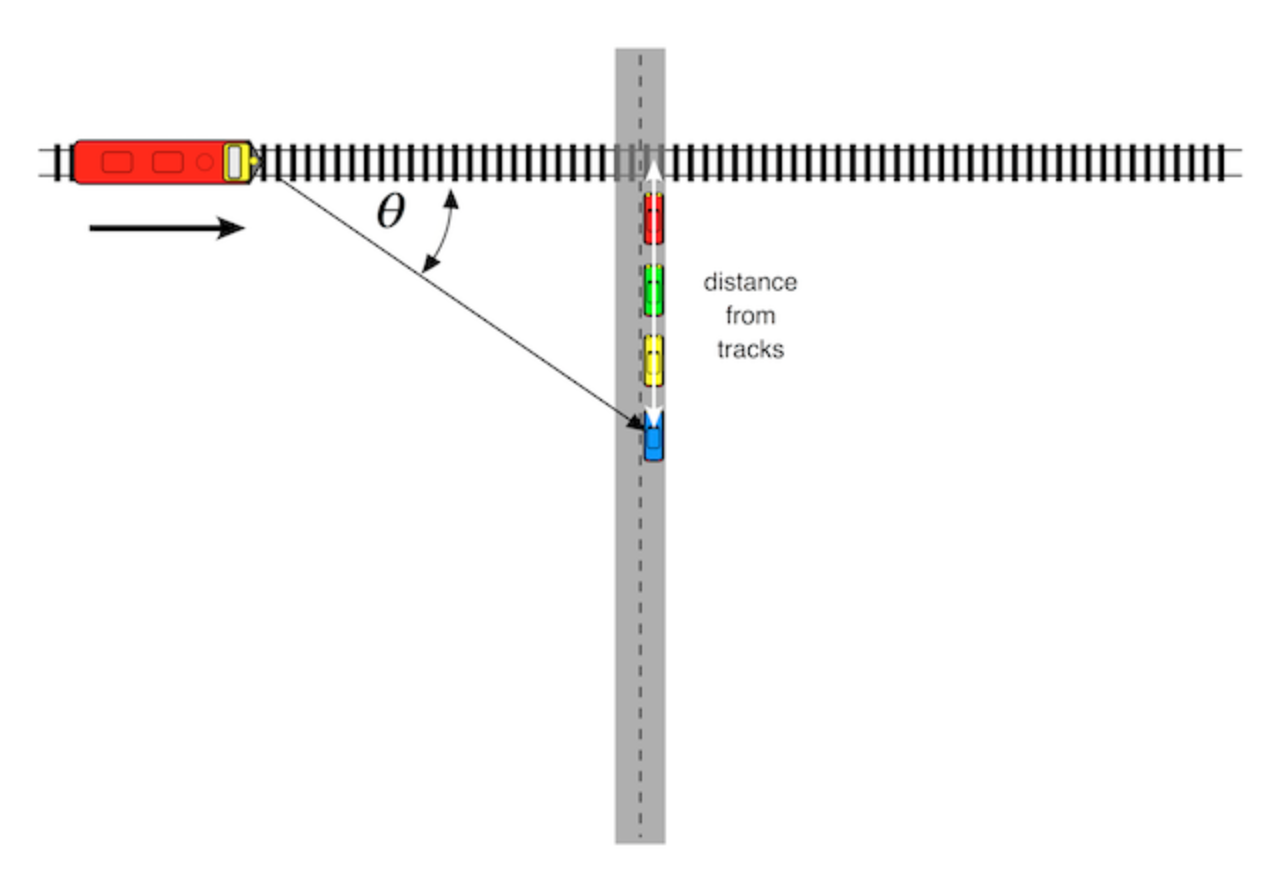

An oncoming train's horn will be higher in pitch than that of a train standing still. As the train gets closer to the listener, the pitch of the horn drops in pitch. At the moment the train hits the crossing, the pitch will be the same as a stationary train. As the train travels away from the crossing, its pitch drops further.

So, let's assume that we are stopped at a train crossing, and our blue car is 50 m back from the tracks. The simulation below assumes that the train will be approaching from the left at 27 m/sec (about 60 mph). We will also assume that the train's horn is a single 1000 Hz tone, and that the speed of sound in air is 340 m/sec.

The following Python code plots the frequencies we will hear as the train goes by:

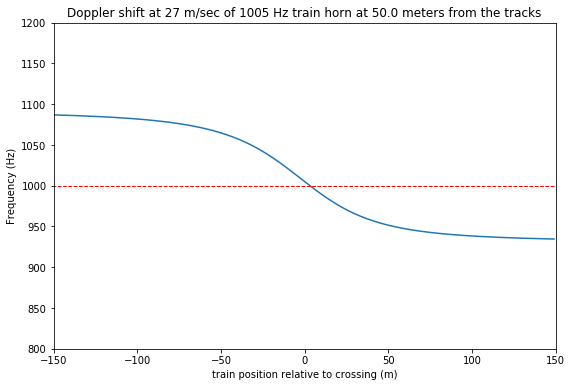

In [54]:
vc = 1005.0 # original frequency in Hz

V = 340.0 # speed of sound in air in m/sec
# maxtime = 200

S = 27.0 # actual velocity in m/sec (60 mph = 27 m/sec)

dmax = 300.0 # width of observation window (m)

d = np.arange(-dmax/2, dmax/2, 1) # 

b = 50.0 # distance from observer to tracks

SR = S * np.array(d)/np.sqrt(np.square(np.array(d)) + b*b)

#t = np.arange(dmax/S,-100, 1)
vo = vc * V/(V + np.array(SR))

#print(vo)

plt.figure(figsize=(9,6))
plt.axis([-150,150,800,1200])
plt.plot(d,vo)
plt.axhline(y=1000, xmin=-150, xmax=150, linewidth=1, linestyle='--', color = 'r')
plt.ylabel("Frequency (Hz)")
plt.xlabel("train position relative to crossing (m)")
plt.title("Doppler shift at {velocity:.0f} m/sec of {frequency:.0f} Hz train horn at {distance} meters from the tracks" .format(velocity = S, distance = b, frequency = vc))
plt.show() 

In [55]:
# train horn frequency

f1 = 1000 

fs = 44100 # sampling frequency, Hz

V = 340.0 # speed of sound in air in m/sec

S = 27.0 # train velocity in m/sec (60 mph = 27 m/sec)

dmax = 100.0 # width of observation window (m)

b = 50.0 # distance from observer to tracks at crossing

# transit time through our observation window
tt = dmax/S

T = 2.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, tt, int(tt*fs), endpoint=False) # time variable

#t = (d + tt/2)/S
# thus St = d + tt/2 --> d = St - dmax/2S

# d = distance of train from crossing 
#    this is negative as the train approaches the crossing
#    and positive after it passes the crossing

d = S*np.array(t) - dmax/2

# SR = radial speed of train
#   add 0.00001 to b to prevent divide by 0 errors

SR = S*np.array(d)/np.sqrt(np.square(d) + (b+0.000001)*(b+0.000001))

# Doppler-shifted frequency component
f1d = f1 * V/(V + SR)

output = np.sin(twopi*np.multiply(f1d, t)) 


Audio(output, rate=fs)

### Next: Audio simulation 2: Mixing two frequencies
Let's start with two pure audio sine waves. For this example, we have chosen two sounds with frequencies of 15 and 17 Hz. The following bit of Python code will plot these two waveforms for us:

Text(0.5,0,'seconds')

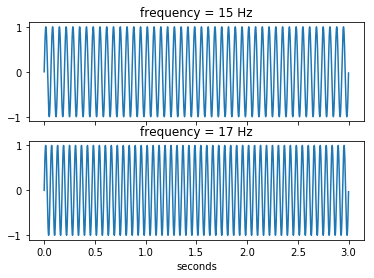

In [76]:
freq_1 = 15 #  frequency 1
freq_2 = 17 # frequency 2
fs = 3500 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

freq_1_output = np.sin(twopi*freq_1*t) 
freq_2_output = np.sin(twopi*freq_2*t)

# now plot these two audio tones
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, freq_1_output)
axarr[0].set_title('frequency = 15 Hz')
axarr[1].plot(t, freq_2_output) 
axarr[1].set_title('frequency = 17 Hz')
axarr[1].set_xlabel('seconds')

Next, we will then mix two tones together. As these two tones go in and out of phase with each other, an interference pattern will be produced.

The next bit of Python code plots this interference pattern for us:

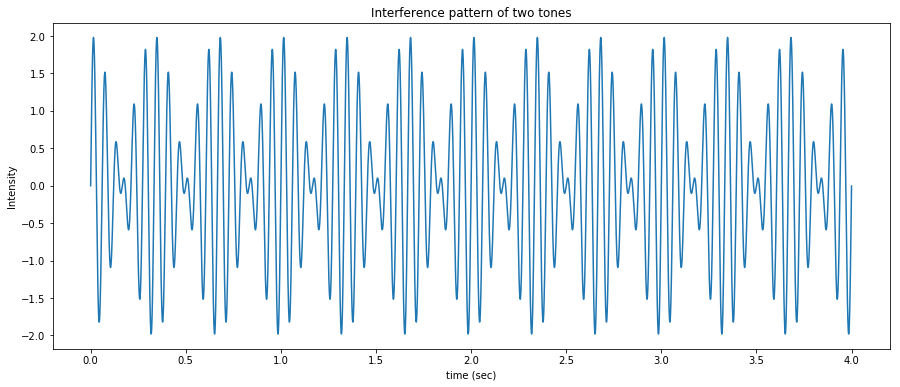

In [65]:
f1 = 15 #  frequency 1
f2 = 18 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 4.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)


import matplotlib.pyplot as plt # load the Python plotting library

plt.figure(figsize=(15,6))
plt.plot(t, output)
plt.ylabel("Intensity")
plt.xlabel("time (sec)")
plt.title("Interference pattern of two tones")
plt.show()

Audio(output, rate=fs) #below the range of hearing!

At the beginning of the plot, the two sounds are in phase with each other, so they add together, producing a signal that is twice as big as eithe of the original signals. When the two sounds are out of phase with each other, they cancel each other out. The frequency of this interference pattern is equal to the difference in the two frequencies. Since we have chosen two frequencies that differ by ony 2 Hz, the interference pattern will occur twice per second.

The frequencies of these two sine waves were chosen to make it easy to see the details of the interference pattern. However, both of these frequencies are below the range of human hearing. Therefore, let's raise each frequency up into the audio range, but still keep the difference in the two frequencies equal to 2 Hz. For this example, we will use tones of 370 and 372 Hz.

Let's plot these and see how the mixture looks..

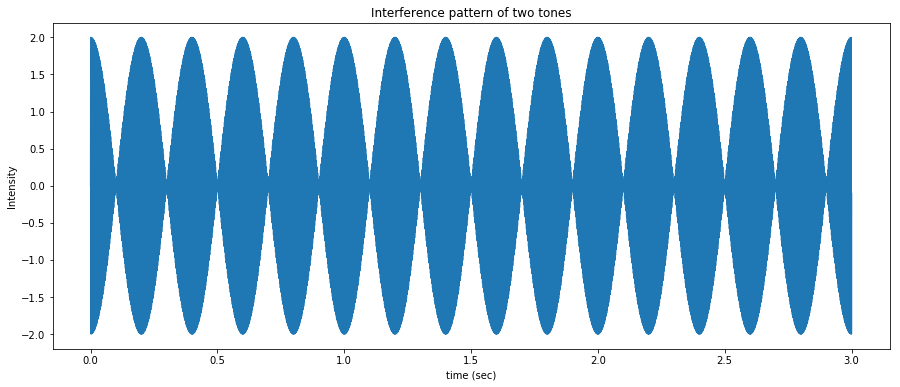

In [74]:
f1 = 370 #  frequency 1
f2 = 375 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)

plt.figure(figsize=(15,6))
plt.plot(t, output)
plt.ylabel("Intensity")
plt.xlabel("time (sec)")
plt.title("Interference pattern of two tones")
plt.show()

In [75]:
#The following code will mix these two tones together and let us hear listen to the mixture.

f1 = 370 #  frequency 1
f2 = 375 # frequency 2
fs = 44100 # sampling frequency, Hz

T = 3.0 # length of tone in seconds
twopi = 2*np.pi

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable

output = np.sin(twopi*f1*t) + np.sin(twopi*f2*t)

Audio(output, rate=fs)